In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [3]:
len(gpus)

0

In [4]:
cpu = tf.config.experimental.list_physical_devices('CPU')

In [5]:
cpu

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
# dodgy images

In [7]:
import cv2
import imghdr

C:\Users\Shivam\AppData\Local\Temp\ipykernel_7252\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'datasets'


In [9]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in exts")
                os.remove(image_path)
        except Exception as e:
            print('issue with image {}'.format(image_path))
        

harry


hermoine
RON
Image not in exts
Image not in exts
Image not in exts
Image not in exts
Image not in exts
Image not in exts
Image not in exts
Image not in exts
Image not in exts


In [11]:
for image_class in os.listdir(data_dir):
    print(image_class)

harry
hermoine
RON


In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir , image_class)):
        print(image)

1480508469-harry-potter-in-90-minutes-1480436463.jpg
150401-tv-feature-harry-potter-image1-vpdnsqfrou.jpg
16870061670094.jpg
1E1h584wsncklUnSfOmfK_w.png
200px-HarryBlood.jpg
2087355-936full_harry_potter_and_the_goblet_of_fire_screenshot.jpg
220px-P_Harry_Potter-icon.svg.png
300px-Harry-Potter-PNG-Background.png
3189716-47.jpg
3fc542812dba415d446dabec3f697627b0-08-harry-potter.2x.h473.w710.jpg
4846d556747cece77e420a781752f3cf.png
4MTItMDhiOGVmZmIwOWMxXkEyXkFqcGdeQXVyNzU1NzE3NTg._V1_QL75_UX500_CR047500281_.jpg
56ffe5a04964cca4e534403a102924b3.jpg
750x513_PBH-poster_web.jpg
a-8-harry-potter-harry.jpg
a-8-harry-potter-harry_3x4.jpg
a-8-harry-potter-ron-harry_3x2.jpg
a5b93ad9c2f8b346c8ebee69e11b036d.jpg
Daniel-Radcliffe-Harry-Potter-and-the-Philosophers.jpg
daniel-radcliffe-harry-potter-movies.jpg
Daniel-Radcliffe-in-the-Epilogue-of-Harry-Potter-and-the-Deathly-Hallows.jpg
Daniel-Radcliffe-Rupert-Grint-Emma-Watson-Harry.jpg
Daniel_Radcliffe_SDCC_2014.jpg
famous-harry-potter-quote.png
fUbaMu

In [13]:
# load the datasets

In [14]:
import numpy as np
from matplotlib import pyplot as plt 

In [15]:
data = tf.keras.utils.image_dataset_from_directory('datasets')

Found 338 files belonging to 3 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

In [18]:
len(batch)
# images and labels

2

In [19]:
batch[0].shape

(32, 256, 256, 3)

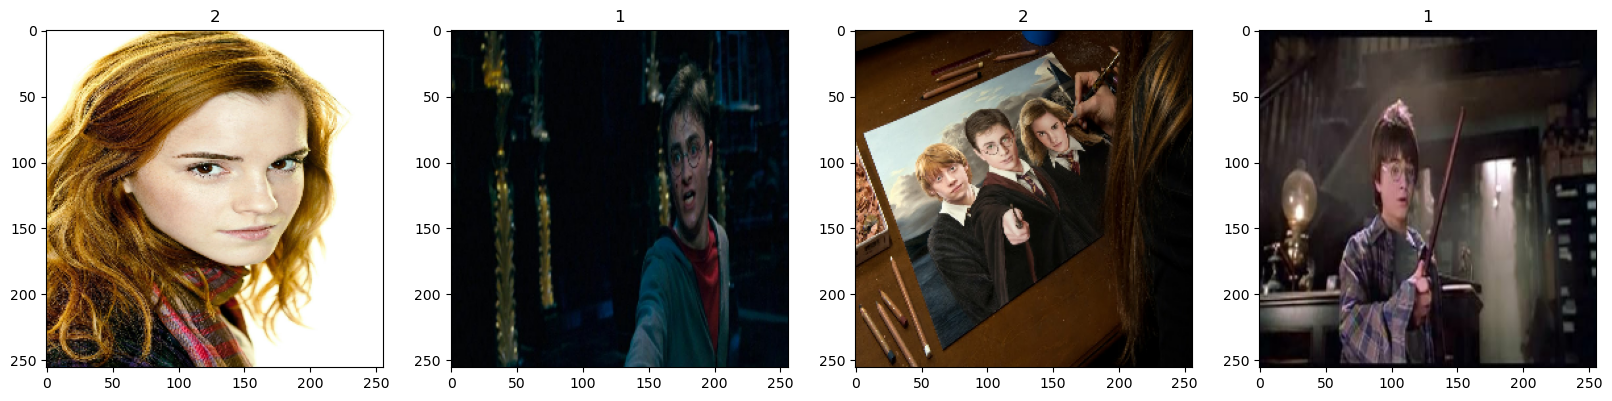

In [20]:
fig, ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [21]:
# ron : 0
# harry : 1
# hermoine : 2

In [22]:
# preprocessing the data

In [23]:
data = data.map(lambda x,y : (x/255, y))

In [24]:
data.as_numpy_iterator().next()[0].min()

0.0

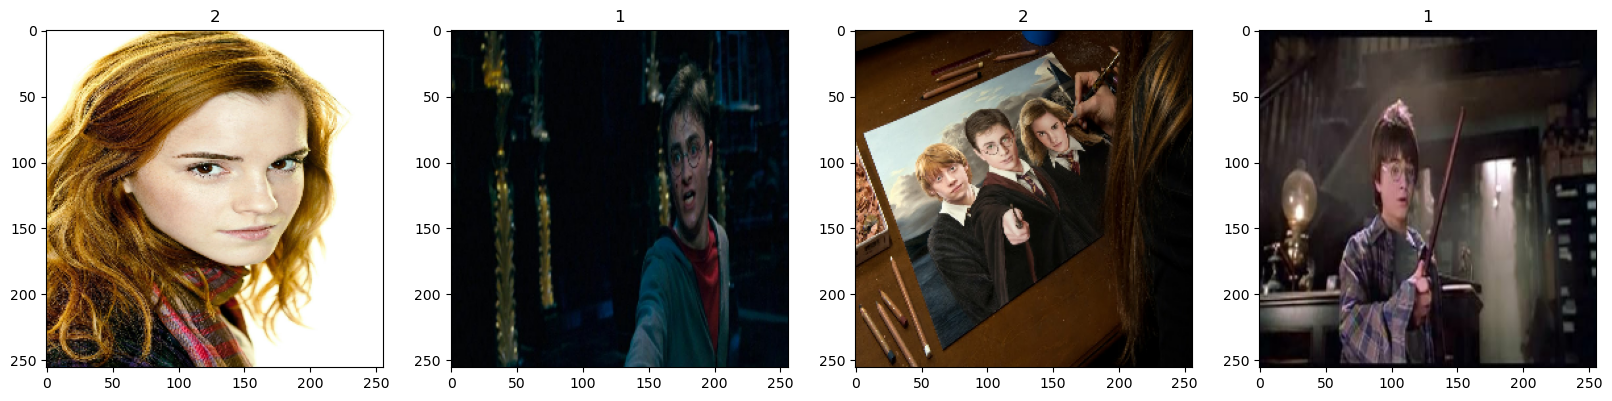

In [25]:
fig, ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [26]:
# splitting the dataset

In [27]:
len(data)

11

In [30]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)+1


In [31]:
train_size+test_size+val_size

11

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
# building a eep learning model

In [35]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten , Dropout

In [36]:
model = Sequential()

In [37]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Example of dropout for regularization
model.add(Dense(3, activation='softmax'))


In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)       

In [40]:
logdir = 'logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


6/6 [==============================] - 9s 1s/step - loss: 0.0879 - accuracy: 0.9792 - val_loss: 0.1210 - val_accuracy: 0.9688
Epoch 2/20
6/6 [==============================] - 10s 1s/step - loss: 0.1294 - accuracy: 0.9688 - val_loss: 0.0459 - val_accuracy: 0.9844
Epoch 3/20
6/6 [==============================] - 11s 2s/step - loss: 0.0955 - accuracy: 0.9740 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 4/20
6/6 [==============================] - 10s 1s/step - loss: 0.1243 - accuracy: 0.9688 - val_loss: 0.1400 - val_accuracy: 0.9375
Epoch 5/20
6/6 [==============================] - 11s 2s/step - loss: 0.1123 - accuracy: 0.9635 - val_loss: 0.0830 - val_accuracy: 0.9844
Epoch 6/20
6/6 [==============================] - 17s 3s/step - loss: 0.0937 - accuracy: 0.9792 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 20s 3s/step - loss: 0.0600 - accuracy: 0.9844 - val_loss: 0.0686 - val_accuracy: 0.9844
Epoch 8/20
6/6 [==============================

In [44]:
# ploting our accuracy 

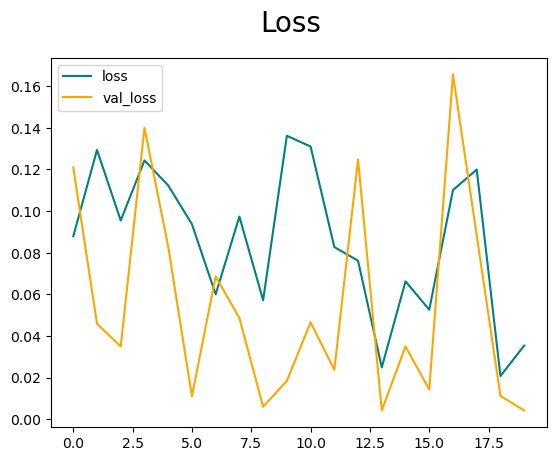

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

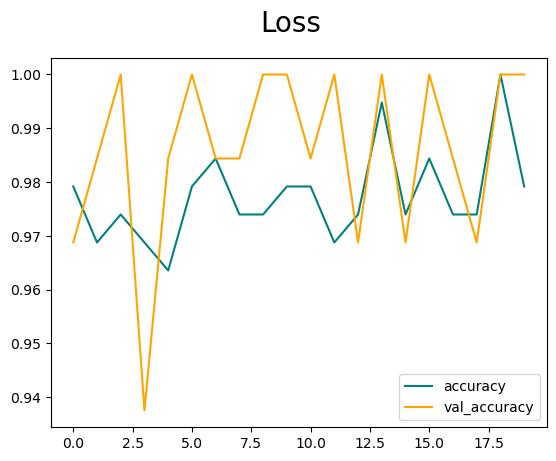

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [47]:
# evaluation

In [48]:
# test

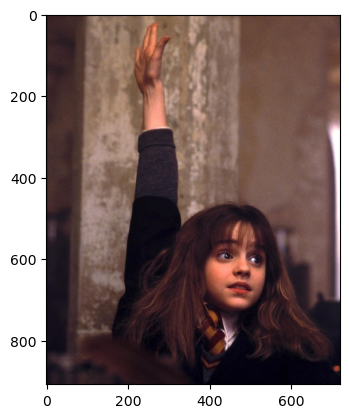

In [49]:
import cv2
img = cv2.imread('tesT_her.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

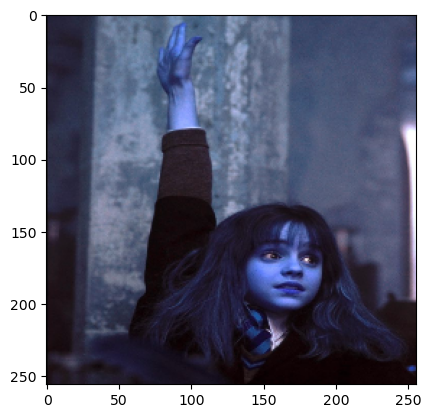

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 150ms/step


In [52]:
yhat[0]

array([0.3797196 , 0.21887314, 0.4014073 ], dtype=float32)

In [53]:
max_index = np.argmax(yhat[0])
print(max_index)

2


In [54]:
def predictionImage(img_path):
    img = cv2.imread(img_path)
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    print(yhat)
    max_index = np.argmax(yhat[0])
    if max_index == 0:
        print("RON")
    elif max_index == 1:
        print("Harry Potter")
    elif max_index == 2:
        print("Hermoine")
    else:
        print("Error")

TESTING

In [55]:
predictionImage('tesT_her.jpeg')

1/1 [==============================] - 0s 40ms/step
[[0.3797196  0.21887314 0.4014073 ]]
Hermoine


In [56]:
predictionImage('harr.jpg')

1/1 [==============================] - 0s 44ms/step
[[1.425090e-03 9.977375e-01 8.373790e-04]]
Harry Potter


In [57]:
predictionImage('ron.jpg')

1/1 [==============================] - 0s 44ms/step
[[0.86206317 0.12204232 0.01589447]]
RON


In [62]:
predictionImage('ron2.jpg')

1/1 [==============================] - 0s 97ms/step
[[0.8721605  0.12035613 0.00748342]]
RON


In [59]:
from tensorflow.keras.models import load_model

In [60]:
# model.save(os.path.join('models', 'golden_trio.h5'))